# YouTube trending videos

In [180]:
%matplotlib inline
import json
import math
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from images_downloading import ImageSize
from tokenizers import Tokenizer

from nltk.corpus import words as nltk_words
import nltk
nltk.download("words")


def autolabel(rects, labels):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                labels[idx],
                ha='center', va='bottom', rotation=0)


def filter_words(row):
    if not isinstance(row["words"], str):
        print(row)
    if row["words"] in nltk_words.words():
        return True
    return False


def tokenize(csv_path:str, df, json_path:str):
    ocr_text_nan_count = 0
    if os.path.exists(csv_path):
        words = pd.read_csv(csv_path, sep=";")
        words = words["words"].to_frame()
        with open(json_path, "r") as file:
            tokenized_titles = json.load(file)
            file.close()
        for i in tqdm(tokenized_titles):
            if not i:
                ocr_text_nan_count += 1
    else:
        words = pd.DataFrame()
        tokenized_titles = []
        for i in tqdm(range(len(df))):
            text = df["ocr_texts"].iloc[i]
            if isinstance(text, str):
                tokens = Tokenizer.tokenize(text)
                tokenized_titles.append(tokens)
                words = words.append(pd.DataFrame(data={"words": Tokenizer.tokenize(df["ocr_texts"].iloc[i])}), ignore_index=True)
            elif isinstance(text, float):
                if math.isnan(text):
                    ocr_text_nan_count += 1
                    tokenized_titles.append([])
            else:
                print(text, type(text))
                tokenized_titles.append([])
        words.to_csv(csv_path, sep=";")
        with open(json_path, "w") as file:
            json.dump(tokenized_titles, file)
            file.close()
    print(len(tokenized_titles))
    print(f"Nan: {ocr_text_nan_count}")
    words_counts = words.value_counts()
    words_counts = words_counts.rename_axis("words").reset_index(name="count")
    print(words_counts)
    return words_counts



[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dominik\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Etap 2 - Atrybuty wizualne


### Wczytanie danych zgrupowanych po id

In [277]:
data_path = "youtube_grouped_by_id_all_list"
gb_videos = pd.read_csv(os.path.join(data_path, "GB_videos_5p.csv"), sep=";", index_col=0)
us_videos = pd.read_csv(os.path.join(data_path, "US_videos_5p.csv"), sep=";", index_col=0)
videos = pd.concat([gb_videos, us_videos])
videos = videos.rename(columns={"description ":"description"})
videos.head(10)

size = ImageSize.hqdefault.default
images_path = os.path.join("images")
gb_images = pd.read_csv(os.path.join(images_path, f"GB_{size}.csv"), sep=";", index_col=0)
us_images = pd.read_csv(os.path.join(images_path, f"US_{size}.csv"), sep=";", index_col=0)

videos_images = pd.concat([gb_images, us_images])
videos_images = videos_images.rename(columns={"description ":"description"})
videos_images.head(10)


,number,id,count,thumbnail_path,error,status
0,0,--uXQQ0h-yQ,9,['images\\default\\0_GB_--uXQQ0h-yQ_0.jpg'],[False],[200]
0,1,-3VBPAZPTQI,14,['images\\default\\1_GB_-3VBPAZPTQI_0.jpg'],[False],[200]
0,2,-43MBOJnVks,2,['images\\default\\2_GB_-43MBOJnVks_0.jpg'],[False],[200]
0,3,-5WBCrazSfg,10,['images\\default\\3_GB_-5WBCrazSfg_0.jpg'],[False],[200]
0,4,-5aaJJQFvOg,34,['images\\default\\4_GB_-5aaJJQFvOg_0.jpg'],[False],[200]
0,5,-7tSTUR7FG0,15,['images\\default\\5_GB_-7tSTUR7FG0_0.jpg'],[False],[200]
0,6,-8X32zNup1o,9,['ERROR'],[True],[404]
0,7,-A9rYcBmBFo,9,['images\\default\\7_GB_-A9rYcBmBFo_0.jpg'],[False],[200]
0,8,-B7J36GNaDk,6,['images\\default\\8_GB_-B7J36GNaDk_0.jpg'],[False],[200]
0,9,-BDImdAfodA,32,['images\\default\\9_GB_-BDImdAfodA_0.jpg'],[False],[200]


Najczęściej występujące obrazy w obu zobu zbiorów

**Wielka Brytania**

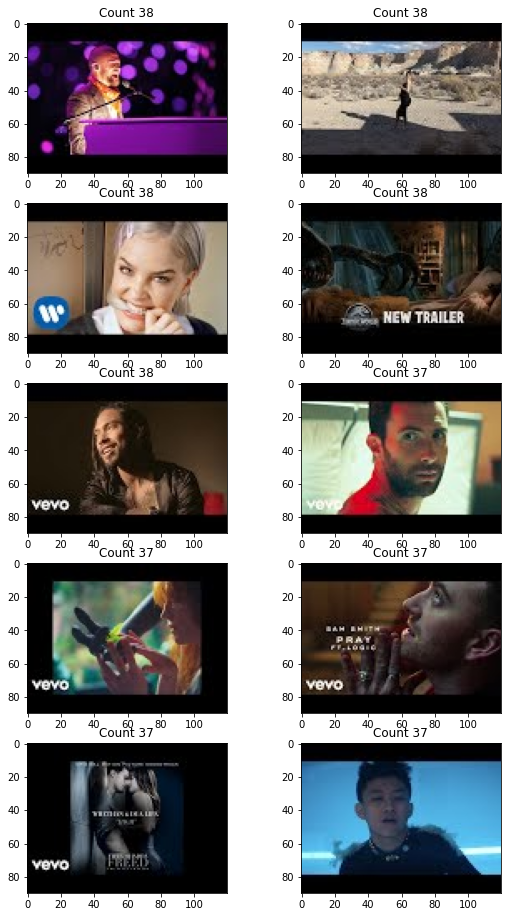

In [280]:
n_top = 10
columns = 2

gb_top = gb_images.nlargest(n_top, "count")

fig, axs = plt.subplots(n_top // columns, columns,figsize=(9,16)) # , gridspec_kw={'height_ratios': [1, 2]}
for i in range(n_top // 2):
    for j in range(columns):
        index = i * columns + j
        image_path = eval(gb_top["thumbnail_path"].iloc[index])[0]
        count = gb_top["count"].iloc[index]
        image = mpimg.imread(image_path)
        axs[i][j].title.set_text(f"Count {count}")
        axs[i][j].imshow(image)

**Stany Zjednoczone**

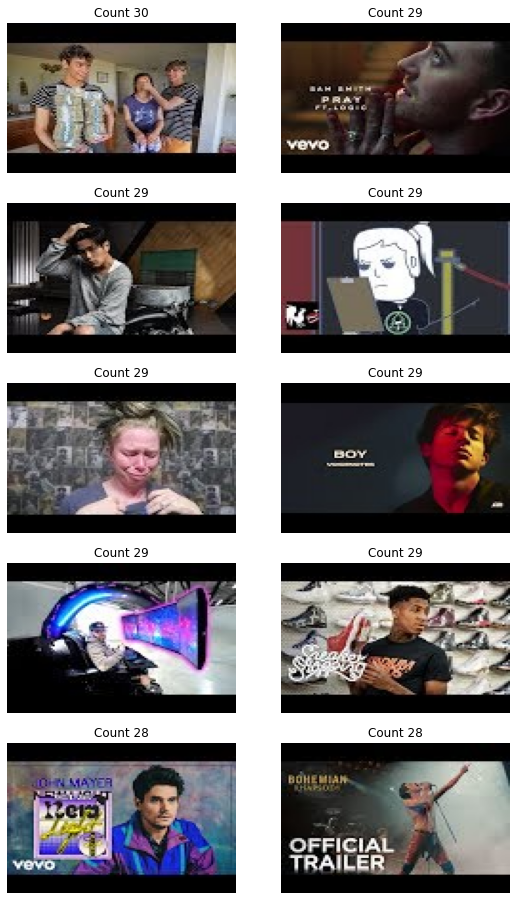

In [281]:
us_top = us_images.nlargest(n_top, "count")

fig, axs = plt.subplots(n_top // columns, columns,figsize=(9,16)) # , gridspec_kw={'height_ratios': [1, 2]}
for i in range(n_top // 2):
    for j in range(columns):
        index = i * columns + j
        image_path = eval(us_top["thumbnail_path"].iloc[index])[0]
        count = us_top["count"].iloc[index]
        image = mpimg.imread(image_path)
        axs[i][j].title.set_text(f"Count {count}")
        axs[i][j].axis('off')
        axs[i][j].imshow(image, aspect='auto')


Cały zbiór:


TODO komentarz

In [282]:
data_path = "images_data"

gb_data = pd.read_csv(os.path.join(data_path, f"GB_images_data.csv"), sep=";", index_col=0)
us_data = pd.read_csv(os.path.join(data_path, f"US_images_data.csv"), sep=";", index_col=0)
eval_columns = ["error", "status", "obj_names", "obj_scores", "emotions", "colors"]

for df in [gb_data, us_data]:
    for c in eval_columns:
        df[c] = df[c].apply(lambda x: eval(x))

Liczba wszystkich prawidłowo pobranych zdjęć i błędnie

In [283]:
for df in [gb_data, us_data]:
    df["unique_count"] = df["error"].apply(lambda x: len(x))
    df["ok_count"] = df["error"].apply(lambda x: x.count(False))
    df["error_count"] = df["error"].apply(lambda x: x.count(True))

videos_data = pd.concat([gb_data, us_data])
videos_data.head(10)

,number,id,count,thumbnail_path,error,status,obj_names,obj_scores,ocr_texts,emotions,colors,unique_count,ok_count,error_count
0,0,--uXQQ0h-yQ,9,['ERROR'],[True],[404],[],[],NaN,[],[],1,0,1
0,1,-3VBPAZPTQI,14,['images\\maxresdefault\\1_GB_-3VBPAZPTQI_0.jpg'],[False],[200],"[person, person]","[0.9412501, 0.8961376]",\r\n\r\n \r\n,[happy],"[([(175, 95, 95), IndianRed], 7588.0), ([(175,...",1,1,0
0,2,-43MBOJnVks,2,['images\\maxresdefault\\2_GB_-43MBOJnVks_0.jpg'],[False],[200],[person],[0.82978743],\r\n,[],"[([(108, 108, 108), Grey42], 8845.0), ([(118, ...",1,1,0
0,3,-5WBCrazSfg,10,['images\\maxresdefault\\3_GB_-5WBCrazSfg_0.jpg'],[False],[200],[person],[0.8106267],\r\n\r\n \r\n\r\nDREAM 5A SIDE\r\n,[happy],"[([(8, 8, 8), Grey3], 9019.0), ([(18, 18, 18),...",1,1,0
0,4,-5aaJJQFvOg,34,['images\\maxresdefault\\4_GB_-5aaJJQFvOg_0.jpg'],[False],[200],"[person, person, person, person, person, tie, ...","[0.8760423, 0.72684914, 0.66787523, 0.63907856...",\r\n,"[neutral, sad, happy, happy, happy]","[([(18, 18, 18), Grey7], 4862.0), ([(28, 28, 2...",1,1,0
0,5,-7tSTUR7FG0,15,['images\\maxresdefault\\5_GB_-7tSTUR7FG0_0.jpg'],[False],[200],"[person, person, person, person, person]","[0.9571229, 0.92626053, 0.91444457, 0.8616719,...",\r\n,[],"[([(158, 158, 158), Grey62], 8439.0), ([(148, ...",1,1,0
0,6,-8X32zNup1o,9,['ERROR'],[True],[404],[],[],NaN,[],[],1,0,1
0,7,-A9rYcBmBFo,9,['images\\maxresdefault\\7_GB_-A9rYcBmBFo_0.jpg'],[False],[200],[],[],\r\n,"[angry, fear]","[([(18, 18, 18), Grey7], 7234.0), ([(8, 8, 8),...",1,1,0
0,8,-B7J36GNaDk,6,['images\\maxresdefault\\8_GB_-B7J36GNaDk_0.jpg'],[False],[200],[],[],\r\n,[],"[([(175, 215, 215), LightCyan3], 7542.0), ([(2...",1,1,0
0,9,-BDImdAfodA,32,['images\\maxresdefault\\9_GB_-BDImdAfodA_0.jpg'],[False],[200],[person],[0.90380037],\r\n,[happy],"[([(28, 28, 28), Grey11], 4443.0), ([(38, 38, ...",1,1,0


**Wielka brytania**

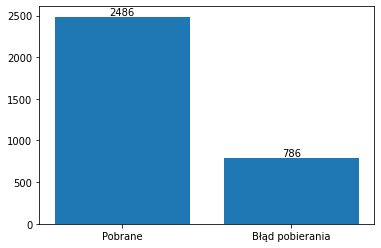

In [185]:
heights = [gb_data["ok_count"].sum(axis=0), gb_data["error_count"].sum(axis=0)]
bars = plt.bar([0, 1], heights)
autolabel(bars, heights)
plt.xticks([0, 1], ["Pobrane", "Błąd pobierania"])
plt.show()

**Stany Zjednoczone**

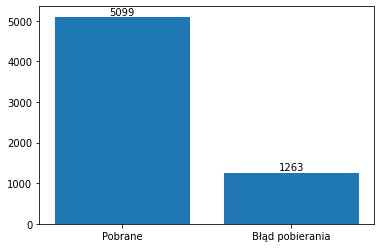

In [186]:
heights = [us_data["ok_count"].sum(axis=0), us_data["error_count"].sum(axis=0)]
bars = plt.bar([0, 1], heights)
autolabel(bars, heights)
plt.xticks([0, 1], ["Pobrane", "Błąd pobierania"])
plt.show()

**Razem**

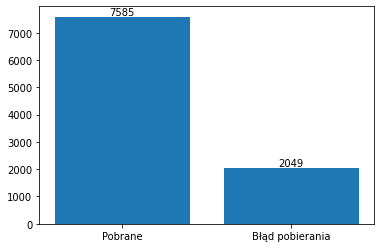

In [187]:
heights = [videos_data["ok_count"].sum(axis=0), videos_data["error_count"].sum(axis=0)]
bars = plt.bar([0, 1], heights)
autolabel(bars, heights)
plt.xticks([0, 1], ["Pobrane", "Błąd pobierania"])
plt.show()

Wykrywanie obiektów

TODO statystyki nie wykrytych obiektów

**Wielka brytania**

In [188]:
gb_objects = gb_data["obj_names"].apply(pd.Series, 1).stack()
gb_objects.index = gb_objects.index.droplevel(-1)
gb_objects.name = "obj_name"

gb_objects = gb_objects.to_frame()
unique_gb_objects = gb_objects["obj_name"].value_counts() #
unique_gb_objects = unique_gb_objects.rename_axis("obj_name").reset_index(name="count")
unique_gb_objects.describe()

,count
count,62.000000
mean,65.064516
std,412.210430
min,1.000000
25%,2.000000
50%,5.000000
75%,14.000000
max,3254.000000


     obj_name  count
0      person   3254
1         tie    144
2         cup     56
3       chair     55
4        vase     46
..        ...    ...
57      bench      1
58       sink      1
59    giraffe      1
60  microwave      1
61      mouse      1

[62 rows x 2 columns]


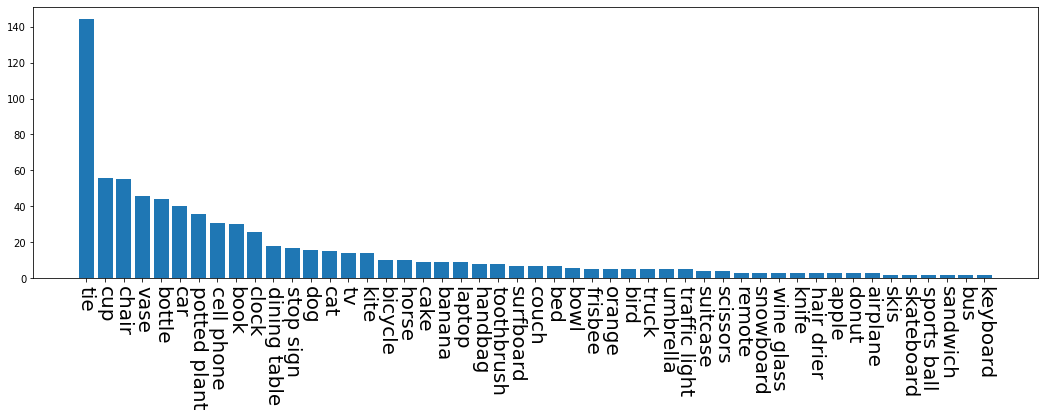

In [189]:
print(unique_gb_objects)
plt.subplots(figsize=(18,5))
plt.bar(unique_gb_objects.head(50).tail(49)["obj_name"], unique_gb_objects.head(50).tail(49)["count"])
plt.xticks(rotation=270, fontsize=20)
plt.show()

**Stany Zjednoczone**

In [190]:
us_objects = us_data["obj_names"].apply(pd.Series, 1).stack()
us_objects.index = us_objects.index.droplevel(-1)
us_objects.name = "obj_name"

us_objects = us_objects.to_frame()
unique_us_objects = us_objects["obj_name"].value_counts() #
unique_us_objects = unique_us_objects.rename_axis("obj_name").reset_index(name="count")
unique_us_objects.describe()

,count
count,76.000000
mean,106.407895
std,679.209328
min,1.000000
25%,4.750000
50%,11.500000
75%,31.250000
max,5937.000000


          obj_name  count
0           person   5937
1              tie    291
2              car    135
3           bottle    117
4             book    117
..             ...    ...
71  baseball glove      2
72           zebra      2
73        broccoli      2
74           sheep      1
75   parking meter      1

[76 rows x 2 columns]


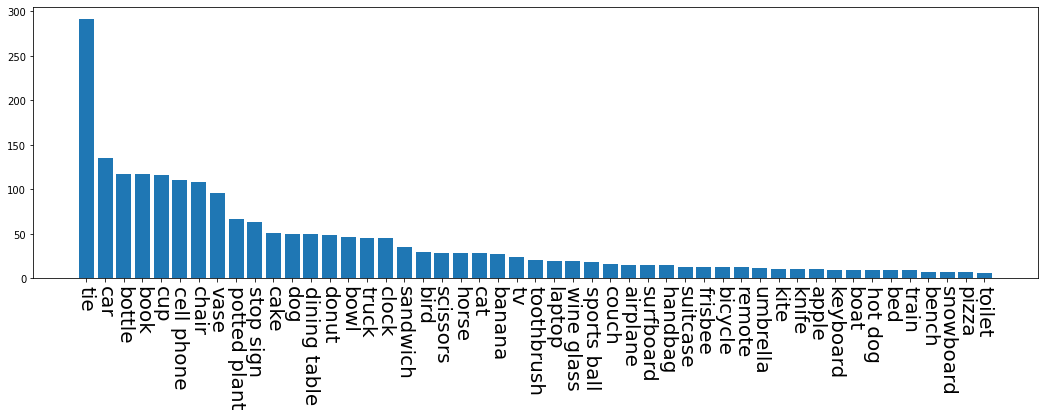

In [191]:
print(unique_us_objects)
plt.subplots(figsize=(18,5))
plt.bar(unique_us_objects.head(50).tail(49)["obj_name"], unique_us_objects.head(50).tail(49)["count"])
plt.xticks(rotation=270, fontsize=20)
plt.show()

**Razem**

In [192]:
objects = pd.concat([gb_objects, us_objects])

unique_objects = objects["obj_name"].value_counts() #
unique_objects = unique_objects.rename_axis("obj_name").reset_index(name="count")
unique_objects.describe()

,count
count,76.000000
mean,159.486842
std,1051.767547
min,1.000000
25%,6.000000
50%,16.500000
75%,39.250000
max,9191.000000


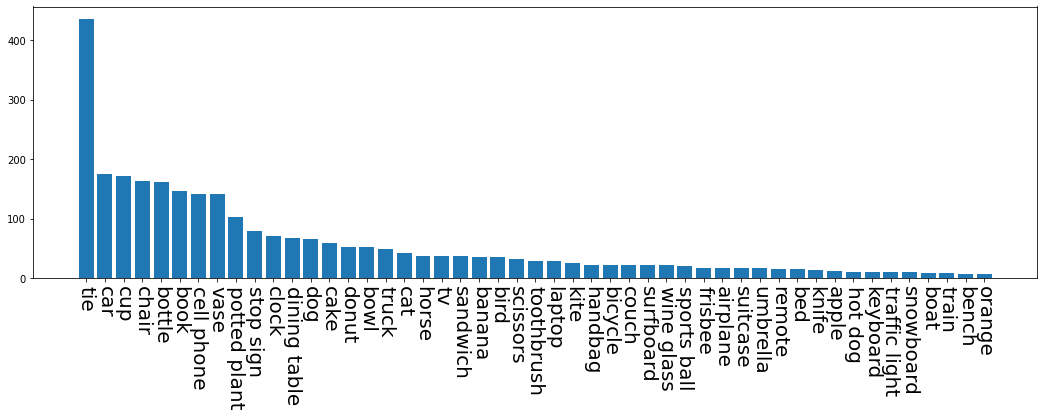

In [193]:
plt.subplots(figsize=(18,5))
plt.bar(unique_objects.head(50).tail(49)["obj_name"], unique_objects.head(50).tail(49)["count"])
plt.xticks(rotation=270, fontsize=20)
plt.show()

TODO w celu poprawy czytelności wykresów wyrzucono klasę PERSON, która najcześciej występuje

Statystyki wystąpień obiektów przemnożone przez ilość wystąpień w zbiorze

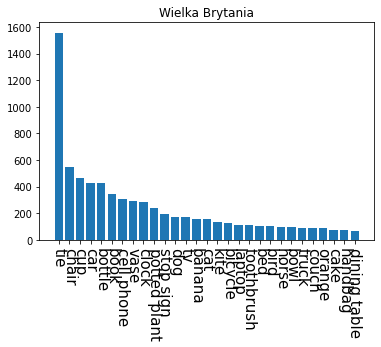

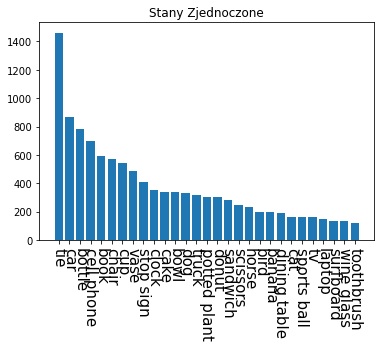

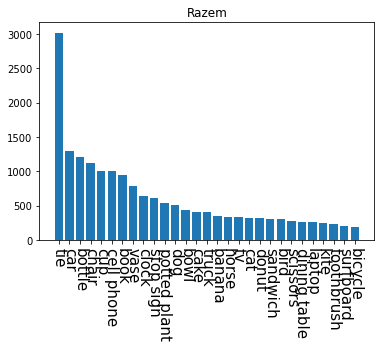

In [262]:
data_sets = [gb_data, us_data, videos_data]
names = ["Wielka Brytania", "Stany Zjednoczone", "Razem"]
for df, name in zip(data_sets, names):
    all_objects = df.explode("obj_names")
    grouped = all_objects.groupby("obj_names")["count"].sum().rename_axis("obj_name").reset_index(name="count")
    grouped = grouped.sort_values(by="count", ascending=False).head(30).tail(29) # TO EXCLUDE PERSON
    plt.bar(np.arange(len(grouped)), grouped["count"])
    plt.title(name)
    plt.xticks(np.arange(len(grouped)),grouped["obj_name"] ,rotation=270, fontsize=15)
    plt.show()



Rozkład "score" z object detection:

**Wielka brytania**

In [195]:
gb_scores = gb_data["obj_scores"].apply(pd.Series, 1).stack()
gb_scores.index = gb_scores.index.droplevel(-1)
gb_scores.name = "obj_score"

gb_scores.describe()

count    4034.000000
mean        0.744076
std         0.137273
min         0.500088
25%         0.623234
50%         0.753278
75%         0.865211
max         0.987154
Name: obj_score, dtype: float64

<AxesSubplot:>

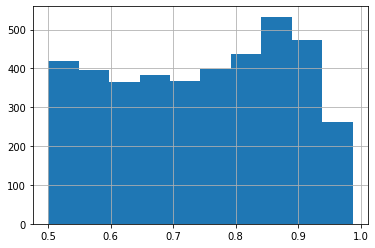

In [75]:
gb_scores.hist()

**Stany Zjednoczone**

In [196]:
us_scores = us_data["obj_scores"].apply(pd.Series, 1).stack()
us_scores.index = us_scores.index.droplevel(-1)
us_scores.name = "obj_score"

us_scores.describe()

count    8087.000000
mean        0.740462
std         0.139954
min         0.500088
25%         0.614561
50%         0.749431
75%         0.866094
max         0.995435
Name: obj_score, dtype: float64

<AxesSubplot:>

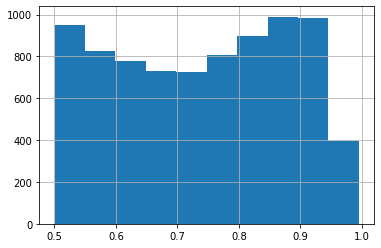

In [77]:
us_scores.hist()

**Razem**

In [197]:
scores = pd.concat([gb_scores, us_scores])

scores.describe()

count    12121.000000
mean         0.741664
std          0.139072
min          0.500088
25%          0.618023
50%          0.750699
75%          0.865448
max          0.995435
Name: obj_score, dtype: float64

<AxesSubplot:>

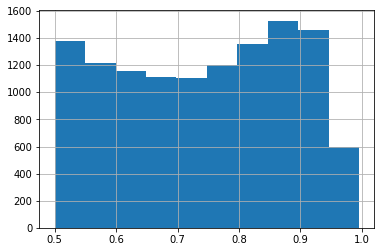

In [198]:
scores.hist()

Emocje


**Wielka brytania**

In [199]:
gb_emotions = gb_data["emotions"].apply(pd.Series, 1).stack()
gb_emotions.index = gb_emotions.index.droplevel(-1)
gb_emotions.name = "emotion"

gb_emotions = gb_emotions.to_frame()
unique_gb_emotions = gb_emotions["emotion"].value_counts() #
unique_gb_emotions = unique_gb_emotions.rename_axis("emotion").reset_index(name="count")
unique_gb_emotions.describe()

,count
count,7.000000
mean,269.714286
std,320.338214
min,2.000000
25%,63.500000
50%,147.000000
75%,437.500000
max,737.000000


    emotion  count
0     happy    737
1   neutral    728
2      fear    147
3       sad    147
4     angry     79
5  surprise     48
6   disgust      2


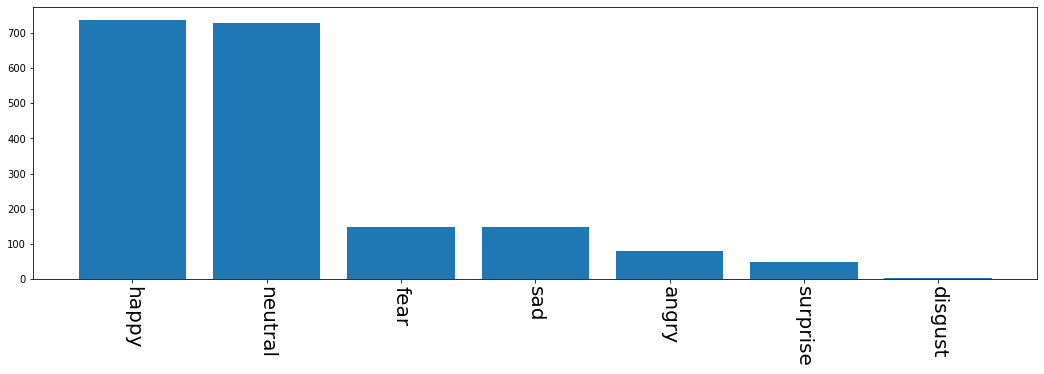

In [200]:
print(unique_gb_emotions)
plt.subplots(figsize=(18,5))
plt.bar(unique_gb_emotions.head(50)["emotion"], unique_gb_emotions.head(50)["count"])
plt.xticks(rotation=270, fontsize=20)
plt.show()

**Stany Zjednoczone**

In [201]:
us_emotions = us_data["emotions"].apply(pd.Series, 1).stack()
us_emotions.index = us_emotions.index.droplevel(-1)
us_emotions.name = "emotion"

us_emotions = us_emotions.to_frame()
unique_us_emotions = us_emotions["emotion"].value_counts() #
unique_us_emotions = unique_us_emotions.rename_axis("emotion").reset_index(name="count")
unique_us_emotions.describe()

,count
count,7.000000
mean,548.285714
std,637.360368
min,10.000000
25%,158.500000
50%,280.000000
75%,812.500000
max,1606.000000


    emotion  count
0     happy   1606
1   neutral   1319
2      fear    306
3       sad    280
4     angry    171
5  surprise    146
6   disgust     10


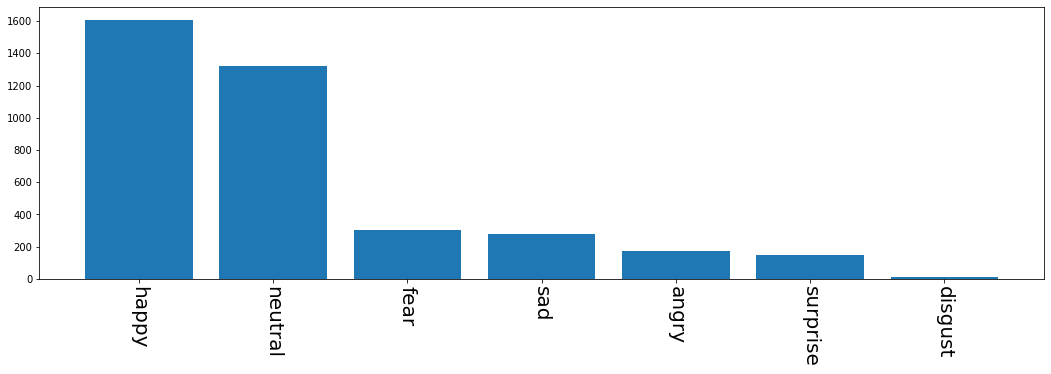

In [202]:
print(unique_us_emotions)
plt.subplots(figsize=(18,5))
plt.bar(unique_us_emotions.head(50)["emotion"], unique_us_emotions.head(50)["count"])
plt.xticks(rotation=270, fontsize=20)
plt.show()

**Razem**

In [203]:
emotions = pd.concat([gb_emotions, us_emotions])

unique_emotions = emotions["emotion"].value_counts() #
unique_emotions = unique_emotions.rename_axis("emotion").reset_index(name="count")
unique_emotions.describe()

,count
count,7.000000
mean,818.000000
std,956.016736
min,12.000000
25%,222.000000
50%,427.000000
75%,1250.000000
max,2343.000000


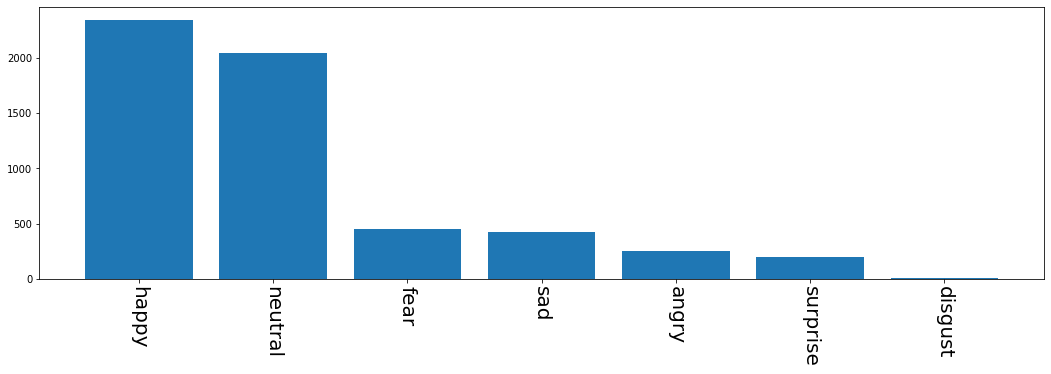

In [204]:
plt.subplots(figsize=(18,5))
plt.bar(unique_emotions.head(50)["emotion"], unique_emotions.head(50)["count"])
plt.xticks(rotation=270, fontsize=20)
plt.show()

Statystyki emocji przemnożone przez ilość wystąpień w zbiorze

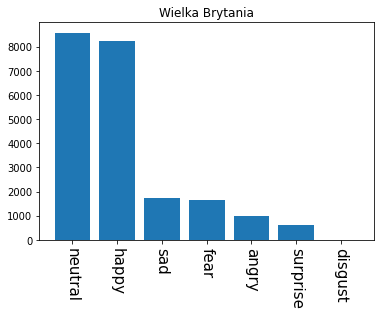

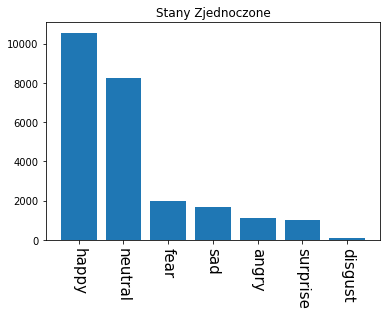

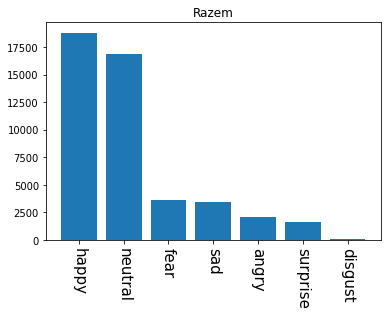

In [205]:
data_sets = [gb_data, us_data, videos_data]
names = ["Wielka Brytania", "Stany Zjednoczone", "Razem"]
for df, name in zip(data_sets, names):
    all_objects = df.explode("emotions")
    grouped = all_objects.groupby("emotions")["count"].sum().rename_axis("emotion").reset_index(name="count")
    grouped = grouped.sort_values(by="count", ascending=False).tail(30).head(29) # TO EXCLUDE PERSON
    plt.bar(np.arange(len(grouped)), grouped["count"])
    plt.title(name)
    plt.xticks(np.arange(len(grouped)),grouped["emotion"] ,rotation=270, fontsize=15)
    plt.show()


Teksty z obrazków

**Wielka brytania**


3272
Nan: 2569
          words  count
0            ee     82
1            ae     67
2          vevo     38
3            oe     37
4            es     35
...         ...    ...
2028        gap      1
2029   gamespot      1
2030  gamerscor      1
2031   gameplay      1
2032        zzz      1

[2033 rows x 2 columns]


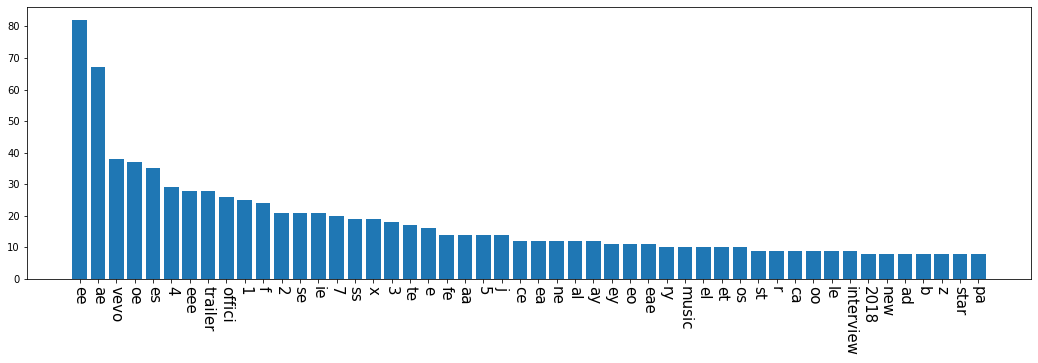

In [206]:
words_counts = tokenize("gb_ocr_text_words.csv", gb_data, "gb_tokenized_ocr_text.json")
wh = words_counts.head(50)
plt.subplots(figsize=(18,5))
plt.bar(wh["words"], wh["count"])
plt.xticks(rotation=270, fontsize=15)
plt.show()

Przefiltrowanie przez słownik nltk

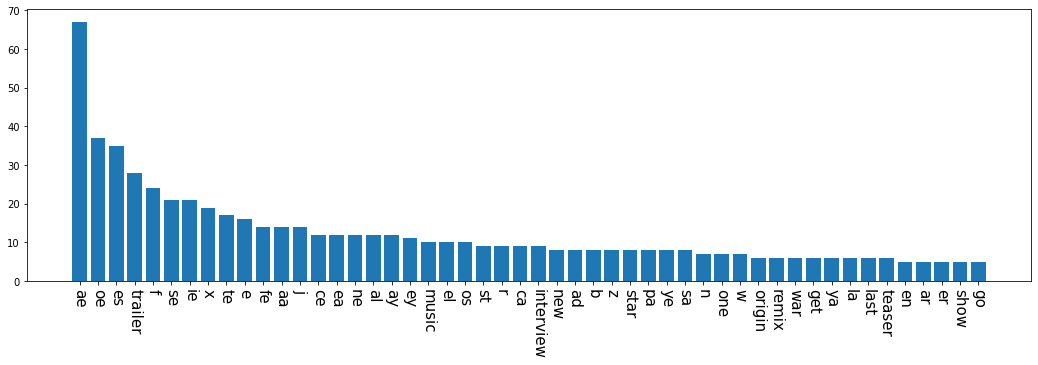

In [207]:
in_words = words_counts.apply(filter_words, axis=1)
words_counts = words_counts[in_words]
wh = words_counts.head(50)
plt.subplots(figsize=(18,5))
plt.bar(wh["words"], wh["count"])
plt.xticks(rotation=270, fontsize=15)
plt.show()

**Stany Zjednoczone**


6354
Nan: 4891
         words  count
0           ee    178
1           ae    134
2            4    115
3            7     69
4           es     65
...        ...    ...
3562  ghaimber      1
3563     ghost      1
3564       gia      1
3565    gibson      1
3566      lamp      1

[3567 rows x 2 columns]


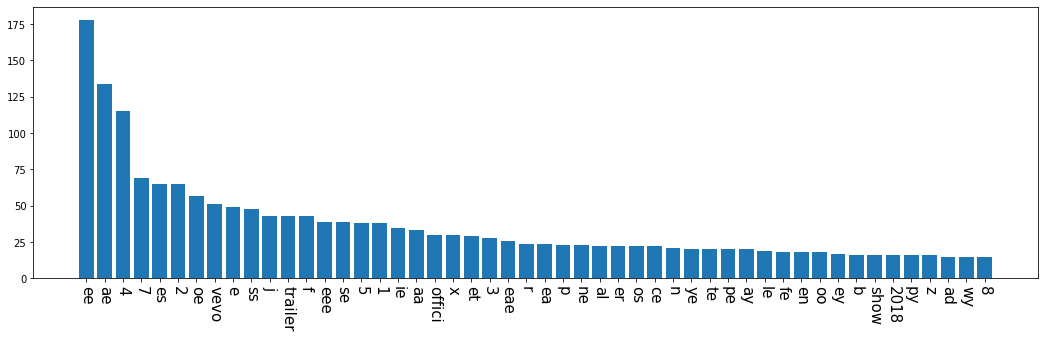

In [208]:
words_counts = tokenize("us_ocr_text_words.csv", us_data, "us_tokenized_ocr_text.json")
wh = words_counts.head(50)
plt.subplots(figsize=(18,5))
plt.bar(wh["words"], wh["count"])
plt.xticks(rotation=270, fontsize=15)
plt.show()

Przefiltrowanie przez słownik nltk

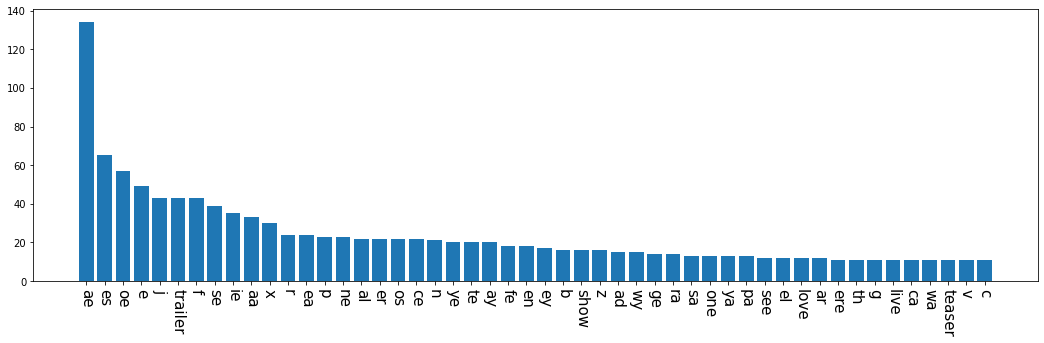

In [209]:
in_words = words_counts.apply(filter_words, axis=1)
words_counts = words_counts[in_words]
wh = words_counts.head(50)
plt.subplots(figsize=(18,5))
plt.bar(wh["words"], wh["count"])
plt.xticks(rotation=270, fontsize=15)
plt.show()

**Razem**


9626
Nan: 7460
        words  count
0          ee    260
1          ae    201
2           4    144
3          es    100
4          oe     94
...       ...    ...
4404     hair      1
4405      hal      1
4406     hala      1
4407  halfpip      1
4408      zzz      1

[4409 rows x 2 columns]


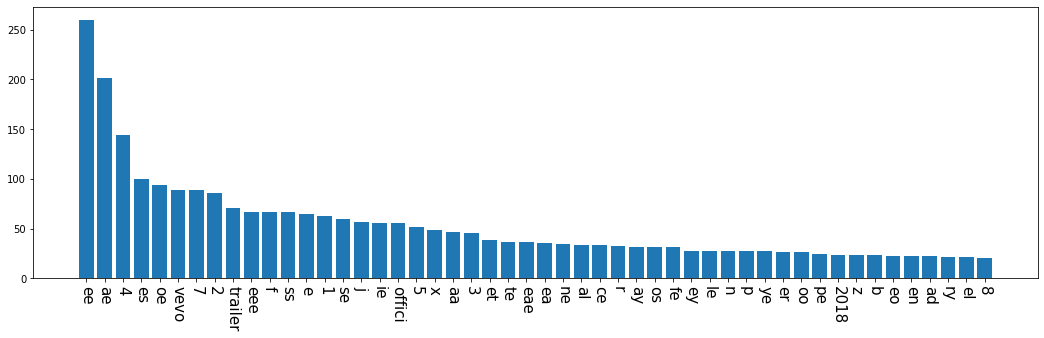

In [210]:
words_counts = tokenize("ocr_text_words.csv", videos_data, "tokenized_ocr_text.json")
wh = words_counts.head(50)
plt.subplots(figsize=(18,5))
plt.bar(wh["words"], wh["count"])
plt.xticks(rotation=270, fontsize=15)
plt.show()

Przefiltrowanie przez słownik nltk

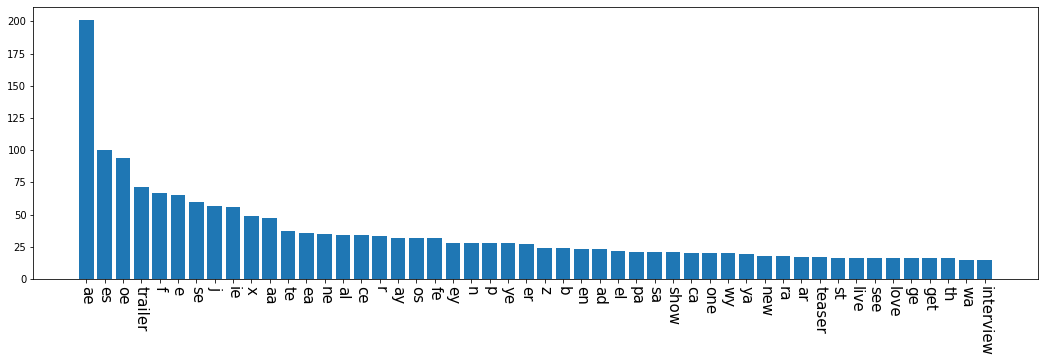

In [211]:
in_words = words_counts.apply(filter_words, axis=1)
words_counts = words_counts[in_words]
wh = words_counts.head(50)
plt.subplots(figsize=(18,5))
plt.bar(wh["words"], wh["count"])
plt.xticks(rotation=270, fontsize=15)
plt.show()

### Kolory


**Wielka brytania**

In [249]:
from extract_colors import tuple_to_hex
from colors import colors_dict


gb_colors = gb_data.explode("colors")
gb_colors["color"] = gb_colors["colors"].apply(lambda x: x if isinstance(x, float) else str(x[0][0]))
gb_colors["color_counts"] = gb_colors["colors"].apply(lambda x: x if isinstance(x, float) else x[1])

gb_colors = gb_colors["color"].apply(pd.Series, 1).stack()
print(gb_colors.head())
gb_colors.index = gb_colors.index.droplevel(-1)
gb_colors.name = "color"

gb_colors = gb_colors.to_frame()
unique_gb_colors = gb_colors["color"].value_counts() #
unique_gb_colors = unique_gb_colors.rename_axis("color").reset_index(name="count")
unique_gb_colors.describe()

0  0      (175, 95, 95)
   0     (175, 135, 95)
   0      (135, 95, 95)
   0    (158, 158, 158)
   0    (178, 178, 178)
dtype: object


,count
count,203.000000
mean,61.231527
std,164.548078
min,1.000000
25%,4.000000
50%,11.000000
75%,40.500000
max,1135.000000


               color  count
0       (28, 28, 28)   1135
1       (18, 18, 18)   1075
2       (38, 38, 38)    981
3       (48, 48, 48)    735
4          (8, 8, 8)    695
..               ...    ...
198  (215, 135, 255)      1
199    (255, 0, 215)      1
200    (128, 128, 0)      1
201   (175, 215, 95)      1
202    (95, 215, 95)      1

[203 rows x 2 columns]


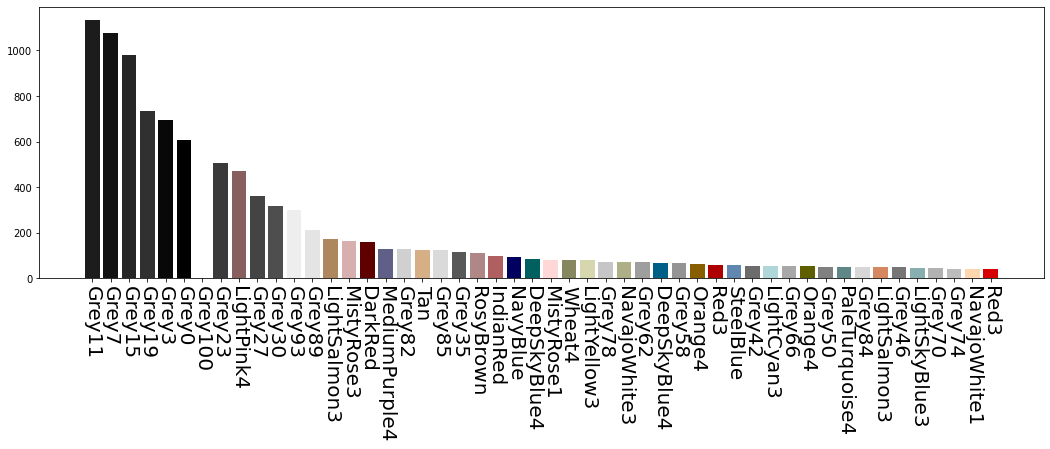

In [251]:
print(unique_gb_colors)
plt.subplots(figsize=(18,5))
colors = [tuple_to_hex(eval(c)) for c in unique_gb_colors.head(50)["color"]]
ticks = [colors_dict[eval(c)] for c in unique_gb_colors.head(50)["color"]]
plt.bar(np.arange(50), unique_gb_colors.head(50)["count"], color=colors)
plt.xticks(np.arange(50), ticks, rotation=270, fontsize=20)
plt.show()

**Stany Zjednoczone**

In [252]:
us_colors = us_data.explode("colors")
us_colors["color"] = us_colors["colors"].apply(lambda x: x if isinstance(x, float) else str(x[0][0]))
us_colors["color_counts"] = us_colors["colors"].apply(lambda x: x if isinstance(x, float) else x[1])

us_colors = us_colors["color"].apply(pd.Series, 1).stack()
print(us_colors.head())
us_colors.index = us_colors.index.droplevel(-1)
us_colors.name = "color"

us_colors = us_colors.to_frame()
unique_us_colors = us_colors["color"].value_counts() 
unique_us_colors = unique_us_colors.rename_axis("color").reset_index(name="count")
unique_us_colors.describe()

0  0       (0, 95, 215)
   0       (18, 18, 18)
   0    (255, 215, 215)
   0    (215, 215, 175)
   0       (28, 28, 28)
dtype: object


,count
count,236.000000
mean,107.923729
std,294.684531
min,1.000000
25%,5.000000
50%,18.500000
75%,62.250000
max,2085.000000


               color  count
0       (28, 28, 28)   2085
1       (18, 18, 18)   1968
2       (38, 38, 38)   1769
3       (48, 48, 48)   1385
4    (255, 255, 255)   1385
..               ...    ...
231    (135, 215, 0)      1
232   (255, 95, 215)      1
233    (135, 255, 0)      1
234  (215, 135, 255)      1
235   (215, 255, 95)      1

[236 rows x 2 columns]


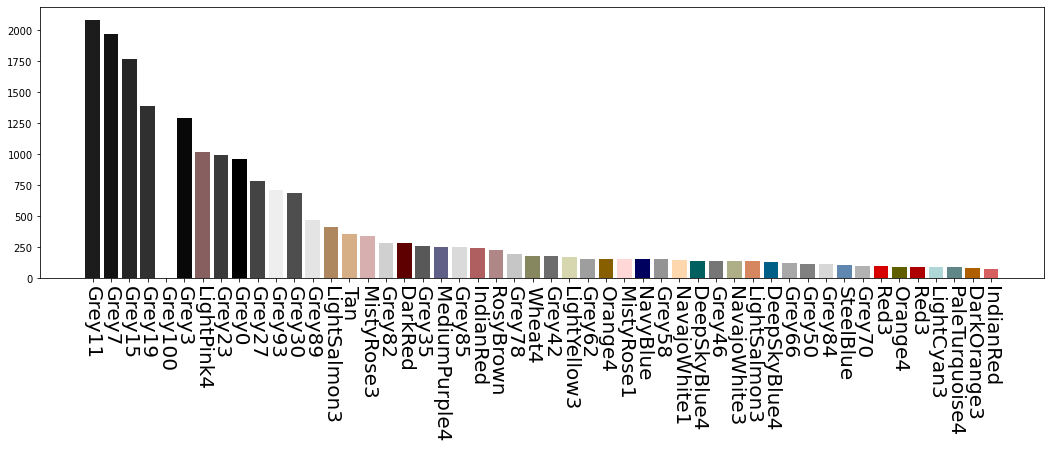

In [253]:
print(unique_us_colors)
plt.subplots(figsize=(18,5))
colors = [tuple_to_hex(eval(c)) for c in unique_us_colors.head(50)["color"]]
ticks = [colors_dict[eval(c)] for c in unique_us_colors.head(50)["color"]]
plt.bar(np.arange(50), unique_us_colors.head(50)["count"], color=colors)
plt.xticks(np.arange(50), ticks, rotation=270, fontsize=20)
plt.show()

**Razem**

In [257]:
colors = pd.concat([gb_data, us_data])

all_colors = colors.explode("colors")
all_colors["color"] = all_colors["colors"].apply(lambda x: x if isinstance(x, float) else str(x[0][0]))
all_colors["color_counts"] = all_colors["colors"].apply(lambda x: x if isinstance(x, float) else x[1])

all_colors = all_colors["color"].apply(pd.Series, 1).stack()
print(all_colors.head())
all_colors.index = all_colors.index.droplevel(-1)
all_colors.name = "color"

all_colors = all_colors.to_frame()
unique_all_colors = all_colors["color"].value_counts() #
unique_all_colors = unique_all_colors.rename_axis("color").reset_index(name="count")
unique_all_colors.describe()

0  0      (175, 95, 95)
   0     (175, 135, 95)
   0      (135, 95, 95)
   0    (158, 158, 158)
   0    (178, 178, 178)
dtype: object


,count
count,240.000000
mean,157.916667
std,444.644168
min,1.000000
25%,6.000000
50%,24.500000
75%,89.750000
max,3220.000000


               color  count
0       (28, 28, 28)   3220
1       (18, 18, 18)   3043
2       (38, 38, 38)   2750
3       (48, 48, 48)   2120
4          (8, 8, 8)   1990
..               ...    ...
235     (0, 255, 95)      1
236   (95, 255, 215)      1
237    (215, 255, 0)      1
238  (135, 255, 175)      1
239    (135, 255, 0)      1

[240 rows x 2 columns]


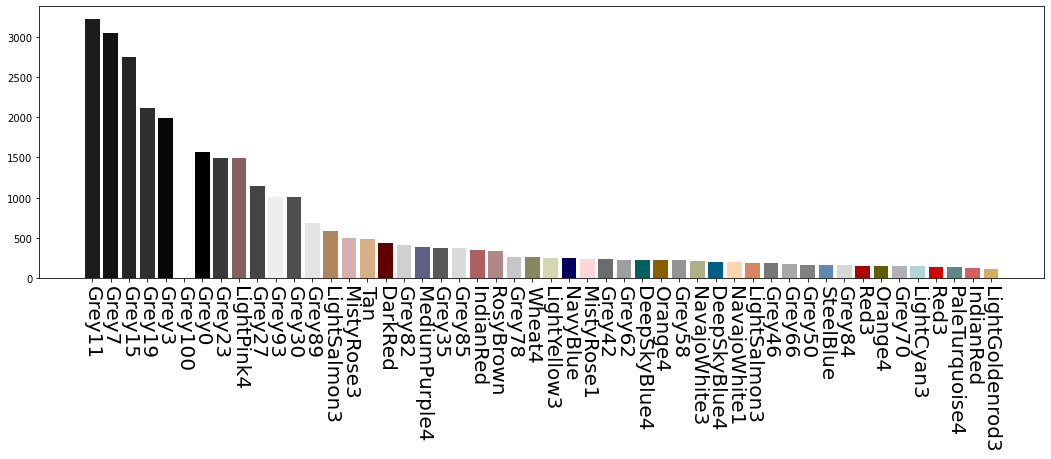

In [258]:
print(unique_all_colors)
plt.subplots(figsize=(18,5))
colors = [tuple_to_hex(eval(c)) for c in unique_all_colors.head(50)["color"]]
ticks = [colors_dict[eval(c)] for c in unique_all_colors.head(50)["color"]]
plt.bar(np.arange(50), unique_all_colors.head(50)["count"], color=colors)
plt.xticks(np.arange(50), ticks, rotation=270, fontsize=20)
plt.show()

Przemnożone przez ilość pikseli danego koloru

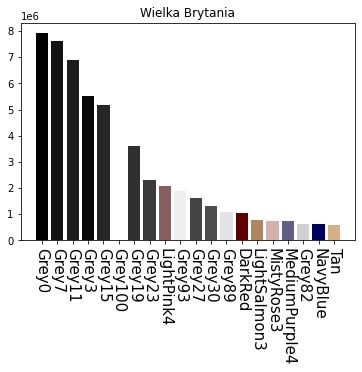

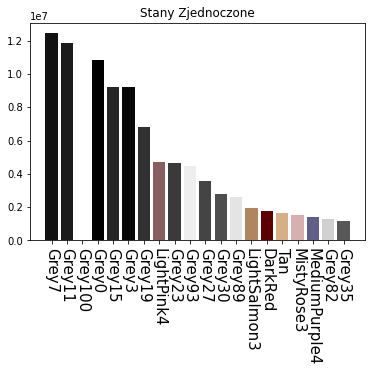

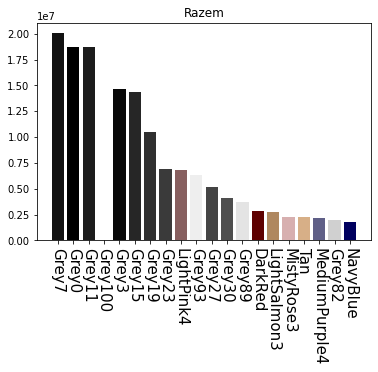

In [275]:
data_sets = [gb_data, us_data, videos_data]
names = ["Wielka Brytania", "Stany Zjednoczone", "Razem"]
for df, name in zip(data_sets, names):
    df_colors = df.explode("colors")
    df_colors["color"] = df_colors["colors"].apply(lambda x: x if isinstance(x, float) else str(x[0][0]))
    df_colors["color_counts"] = df_colors["colors"].apply(lambda x: x if isinstance(x, float) else x[1])


    grouped = df_colors.groupby("color")["color_counts"].sum().rename_axis("color").reset_index(name="count")
    grouped = grouped.sort_values(by="count", ascending=False).head(20) # TO EXCLUDE PERSON
    colors = [tuple_to_hex(eval(c)) for c in grouped["color"]]
    ticks = [colors_dict[eval(c)] for c in grouped["color"]]
    plt.bar(np.arange(len(grouped)), grouped["count"], color=colors)
    plt.title(name)
    plt.xticks(np.arange(len(grouped)),ticks ,rotation=270, fontsize=15)
    plt.show()
